In [1]:
#import the API and getpass
from arcgis.gis import GIS
from getpass import getpass

#authenticate with your account (create a free one here: https://www.arcgis.com/home/createaccount.html)
gis = GIS("https://www.arcgis.com", "astrng", getpass())
print(gis)

········
GIS @ https://www.arcgis.com


City of Sac has some cool data inside their open data site (data.cityofsacramento.org) such as :
* [On Street Parking](http://data.cityofsacramento.org/datasets/onstreetparking)
* [Signs](http://data.cityofsacramento.org/datasets/signs)
* [Streetlights](http://data.cityofsacramento.org/datasets/streetlights)
* [City Maintained Trees](http://data.cityofsacramento.org/datasets/city-maintained-trees)
* [And more!](http://data.cityofsacramento.org/datasets)

<Item title:"Streetlights" type:Feature Layer Collection owner:Publisher_SacCity>
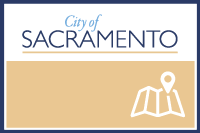

In [4]:
#Let's work with the Streetlights layer
lights = gis.content.get('ca7680fe3a734c6684c4b6f48e07548e')
lights

In [5]:
#We can clone this to our own account
lights_copy = gis.content.add(trees, data=trees.url, folder="python_api")
lights_copy

<Item title:"Streetlights" type:Feature Layer Collection owner:astrng>

In [6]:
# Now let's query this data in pandas
from arcgis.features import FeatureLayer
import pandas as pd

#make query
feature_layer = FeatureLayer.fromitem(lights_copy)
features = feature_layer.query()

#open features in pandas data frame 
df = features.df
df

,COLOR,COMMISSION_DATE,ESRI_OID,FIXTURE,GISOBJID,LAMP_TYPE,OBJECTID,OBJ_CODE,OWNER,PLAN_NO,POLE_TYPE,SERVICE_NO,WATTAGE,SHAPE
0,YES,1327276800000,1,None,100020032,HPS,31042,SLT-31042,DOT,E-1728,PT,866,100,"{'x': 6708015.8399988115, 'y': 1991906.3954418..."
1,YES,1327276800000,2,None,100020033,HPS,31043,SLT-31043,DOT,E-1728,PT,866,100,"{'x': 6708035.750063986, 'y': 1991695.3676486313}"
2,YES,1327276800000,3,None,100020035,HPS,31048,SLT-31048,DOT,E-1728,PT,866,100,"{'x': 6708173.764551729, 'y': 1992057.7662020475}"
3,NO,1327276800000,4,None,100018084,HPS,31054,SLT-31054,DOT,E-3169,PT,1454,100,"{'x': 6701356.888749808, 'y': 1994892.039076805}"
4,NO,1327276800000,5,None,100018085,HPS,31055,SLT-31055,DOT,E-3169,PT,1454,100,"{'x': 6701522.896619901, 'y': 1994872.357685715}"
5,NO,1327276800000,6,None,100018086,HPS,31057,SLT-31057,DOT,E-3169,PT,1454,100,"{'x': 6700884.02749081, 'y': 1994317.6028897166}"
6,YES,1327276800000,7,None,100018087,HPS,31062,SLT-31062,DOT,E-3449,ORN,1602,100,"{'x': 6703000.599701226, 'y': 2009337.3947004676}"
7,YES,1327276800000,8,None,100018088,HPS,31063,SLT-31063,DOT,E-3449,ORN,1602,100,"{'x': 6702891.6304309815, 'y': 2009373.685966462}"
8,YES,1327276800000,9,None,100018129,HPS,31075,SLT-31075,DOT,E-3449,ORN,1602,100,"{'x': 6702725.902087897, 'y': 2009831.8920710534}"
9,YES,1327276800000,10,None,100018130,HPS,31076,SLT-31076,DOT,E-3449,ORN,1602,100,"{'x': 6702594.230763316, 'y': 2009868.1830089688}"


In [12]:
#Can we calculate energy consumption by total wats? http://www.lightsearch.com/resources/lightguides/formulas.html
watt = df['WATTAGE']
watt = pd.to_numeric(watt)

**Calculation**

Energy Consumption (kWh) = System Input Wattage (kW) x Hours of Operation/Year

**Hours of Operation/Year**

We can assume street lights in Sacramento run for 9 hours a night, 9 * 365 days = 3,285 hours of operation a year. 

**KwH**

A kilowatt-hour is 1,000 watts used for one hour. To calculate KwH we simply need to divide our watt column by 1,000. 

In [10]:
#Get KwH from Watts
kwh = watt/1000
kwh

0        0.10
1        0.10
2        0.10
3        0.10
4        0.10
5        0.10
6        0.10
7        0.10
8        0.10
9        0.10
10       0.10
11       0.10
12       0.10
13       0.10
14       0.10
15       0.10
16       0.11
17       0.11
18       0.10
19       0.11
20       0.11
21       0.15
22       0.11
23       0.11
24       0.15
25       0.11
26       0.11
27       0.15
28       0.11
29       0.11
         ... 
39700     NaN
39701     NaN
39702     NaN
39703     NaN
39704     NaN
39705     NaN
39706     NaN
39707     NaN
39708     NaN
39709     NaN
39710     NaN
39711     NaN
39712     NaN
39713     NaN
39714     NaN
39715     NaN
39716     NaN
39717     NaN
39718     NaN
39719     NaN
39720     NaN
39721     NaN
39722     NaN
39723     NaN
39724     NaN
39725     NaN
39726     NaN
39727     NaN
39728     NaN
39729     NaN
Name: WATTAGE, Length: 39730, dtype: float64

In [13]:
#now we can calculate total energy consumption by mulitplying each KwH by the total hours of operation
energy_consumption = kwh * 3,285